In [1]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [1]:
from modeling_clip import CLIP
import os
import time
from PIL import Image, ImageDraw, ImageFont

# Initialize components
clip_model = CLIP(device="cpu")

frames = [
    "/home/ajeet/codework/dataset_frames/2655744/0_391.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_392.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_393.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_394.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_395.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_396.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_397.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_398.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_398.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_400.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_401.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_402.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_403.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_404.jpg",


]

images, image_embeddings = clip_model.get_image_embeddings(frames)

/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Memory taken by input tensor: 8.04 MB


In [2]:
import torch

# Define the embeddings
embeddings = torch.tensor([
    [0.0211, 0.0247],
    [0.0150, 0.0294],
    [0.0125, 0.0287],
    [0.0010, 0.0217],
    [0.0050, 0.0042],
    [0.0159, 0.0028],
    [0.0029, 0.0064],
    [0.0107, -0.0007]
])

# Compute the mean along the first dimension (dim=0)
mean_embeddings = torch.mean(embeddings, dim=0)
print(mean_embeddings)


tensor([0.0105, 0.0147])


In [4]:
import matplotlib.pyplot as plt
import torch

images_to_process = [
    "/home/ajeet/codework/dataset_frames/2655744/0_391.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_392.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_393.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_394.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_395.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_396.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_397.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_398.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_398.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_400.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_401.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_402.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_403.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_404.jpg",


]

# def my_function(images_to_process, text_prompts):

#     for image_path in images_to_process:
#         image = Image.open(image_path)

#         # inputs = processor(text=["a photo of a person", "a photo of a multiple persons", "A photo of two men"], images=image, return_tensors="pt", padding=True)
#         inputs = processor(text=text_prompts, images=image, return_tensors="pt", padding=True)

#         with torch.no_grad():
#             outputs = model(**inputs)
#             logits_per_image = outputs.logits_per_image # this is the image-text similarity score
#             probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
#             print(probs)

#         small_image = image.resize((64, 64))

#         # Display the image at 64x64 pixels
#         plt.figure(figsize=(0.64, 0.64))  # Set figure size for 64x64 pixels
#         plt.imshow(small_image)
#         plt.axis('off')  # Hide axes
#         plt.show()  # Show the image

import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

import torch
from PIL import Image
import matplotlib.pyplot as plt

def my_function(images_to_process, text_prompts):
    for image_path in images_to_process:
        image = Image.open(image_path)

        # Prepare inputs for the model
        inputs = processor(text=text_prompts, images=image, return_tensors="pt", padding=True)

        with torch.no_grad():
            outputs = model(**inputs)
            logits_per_image = outputs.logits_per_image  # Get the image-text similarity score
            probs = logits_per_image.softmax(dim=1)  # Compute probabilities from logits

            # Get image and text embeddings
            image_embeddings = outputs.image_embeds  # Get the image embeddings
            text_embeddings = outputs.text_embeds  # Get the text embeddings
            
            # Calculate cosine similarity
            cosine_similarities = torch.nn.functional.cosine_similarity(image_embeddings, text_embeddings)

            # Print probabilities and cosine similarities
            print("Probabilities:", probs)
            print("Cosine Similarities:", cosine_similarities)

        small_image = image.resize((64, 64))

        # Display the image at 64x64 pixels
        plt.figure(figsize=(0.64, 0.64))  # Set figure size for 64x64 pixels
        plt.imshow(small_image)
        plt.axis('off')  # Hide axes
        plt.show()  # Show the image



text_prompts =["a photo of a person", "a photo of a multiple persons", "A photo of two men"]
my_function(images_to_process, text_prompts)

NameError: name 'processor' is not defined

tensor([[0.0775, 0.7847, 0.0757, 0.0621]], grad_fn=<SoftmaxBackward0>)


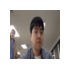

tensor([[0.0943, 0.4269, 0.0539, 0.4249]], grad_fn=<SoftmaxBackward0>)


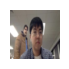

tensor([[0.0504, 0.8744, 0.0468, 0.0284]], grad_fn=<SoftmaxBackward0>)


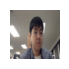

tensor([[0.0902, 0.3091, 0.0732, 0.5275]], grad_fn=<SoftmaxBackward0>)


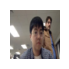

tensor([[0.0294, 0.3632, 0.0761, 0.5312]], grad_fn=<SoftmaxBackward0>)


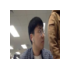

tensor([[0.0432, 0.2698, 0.0765, 0.6105]], grad_fn=<SoftmaxBackward0>)


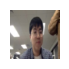

tensor([[0.0391, 0.8853, 0.0508, 0.0248]], grad_fn=<SoftmaxBackward0>)


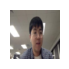

tensor([[0.0607, 0.8440, 0.0619, 0.0334]], grad_fn=<SoftmaxBackward0>)


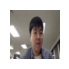

tensor([[0.0607, 0.8440, 0.0619, 0.0334]], grad_fn=<SoftmaxBackward0>)


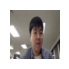

tensor([[0.0481, 0.8363, 0.0543, 0.0614]], grad_fn=<SoftmaxBackward0>)


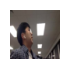

tensor([[0.0594, 0.8160, 0.0391, 0.0855]], grad_fn=<SoftmaxBackward0>)


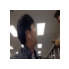

tensor([[0.0348, 0.2575, 0.0473, 0.6604]], grad_fn=<SoftmaxBackward0>)


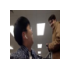

tensor([[0.0515, 0.2601, 0.0400, 0.6484]], grad_fn=<SoftmaxBackward0>)


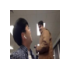

tensor([[0.0408, 0.8676, 0.0557, 0.0358]], grad_fn=<SoftmaxBackward0>)


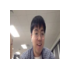

In [12]:
text_prompts =["A photo of no person present", "A photo of a person", "A photo of a multiple persons", "A photo of two men"]
my_function(images_to_process, text_prompts)

tensor([[0.0854, 0.8114, 0.0401, 0.0630]], grad_fn=<SoftmaxBackward0>)


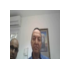

tensor([[0.1092, 0.7056, 0.0663, 0.1189]], grad_fn=<SoftmaxBackward0>)


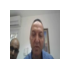

tensor([[0.0585, 0.8519, 0.0421, 0.0475]], grad_fn=<SoftmaxBackward0>)


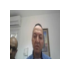

tensor([[0.0855, 0.7563, 0.0554, 0.1029]], grad_fn=<SoftmaxBackward0>)


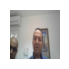

tensor([[0.1049, 0.7724, 0.0491, 0.0736]], grad_fn=<SoftmaxBackward0>)


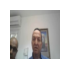

tensor([[0.1140, 0.7256, 0.0589, 0.1015]], grad_fn=<SoftmaxBackward0>)


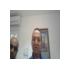

tensor([[0.1194, 0.7446, 0.0545, 0.0815]], grad_fn=<SoftmaxBackward0>)


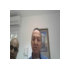

tensor([[0.1461, 0.6897, 0.0758, 0.0885]], grad_fn=<SoftmaxBackward0>)


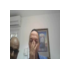

tensor([[0.1792, 0.6122, 0.0867, 0.1219]], grad_fn=<SoftmaxBackward0>)


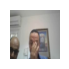

tensor([[0.1975, 0.6474, 0.0728, 0.0823]], grad_fn=<SoftmaxBackward0>)


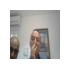

In [13]:
images_to_process = [
    "/home/ajeet/codework/dataset_frames/2602597/0_54.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_55.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_56.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_57.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_58.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_59.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_60.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_61.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_62.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_63.jpg",


]

text_prompts =["A photo of no person present", "A photo of a person", "A photo of a multiple persons", "A photo of two men"]
my_function(images_to_process, text_prompts)

tensor([[0.2008, 0.5568, 0.0944, 0.1481]], grad_fn=<SoftmaxBackward0>)


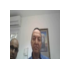

tensor([[0.2398, 0.3538, 0.1456, 0.2609]], grad_fn=<SoftmaxBackward0>)


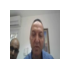

tensor([[0.1728, 0.5625, 0.1244, 0.1402]], grad_fn=<SoftmaxBackward0>)


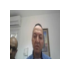

tensor([[0.1743, 0.5028, 0.1130, 0.2099]], grad_fn=<SoftmaxBackward0>)


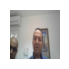

tensor([[0.2339, 0.4926, 0.1094, 0.1641]], grad_fn=<SoftmaxBackward0>)


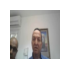

tensor([[0.2301, 0.4460, 0.1189, 0.2050]], grad_fn=<SoftmaxBackward0>)


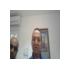

tensor([[0.2702, 0.4220, 0.1233, 0.1845]], grad_fn=<SoftmaxBackward0>)


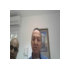

tensor([[0.2584, 0.4510, 0.1340, 0.1565]], grad_fn=<SoftmaxBackward0>)


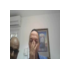

tensor([[0.2846, 0.3841, 0.1378, 0.1935]], grad_fn=<SoftmaxBackward0>)


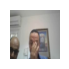

tensor([[0.3453, 0.3835, 0.1272, 0.1439]], grad_fn=<SoftmaxBackward0>)


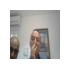

In [16]:
text_prompts =["A photo of no person present", "A photo of a single person", "A photo of a multiple persons", "A photo of two men"]
my_function(images_to_process, text_prompts)

tensor([[0.6631, 0.1605, 0.1764]], grad_fn=<SoftmaxBackward0>)


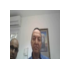

tensor([[0.4121, 0.2839, 0.3039]], grad_fn=<SoftmaxBackward0>)


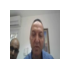

tensor([[0.6433, 0.1963, 0.1603]], grad_fn=<SoftmaxBackward0>)


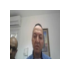

tensor([[0.5776, 0.1813, 0.2411]], grad_fn=<SoftmaxBackward0>)


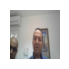

tensor([[0.6029, 0.1963, 0.2008]], grad_fn=<SoftmaxBackward0>)


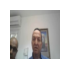

tensor([[0.5432, 0.2072, 0.2496]], grad_fn=<SoftmaxBackward0>)


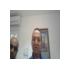

tensor([[0.5209, 0.2513, 0.2278]], grad_fn=<SoftmaxBackward0>)


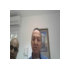

tensor([[0.5951, 0.1983, 0.2066]], grad_fn=<SoftmaxBackward0>)


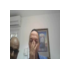

tensor([[0.5030, 0.2435, 0.2534]], grad_fn=<SoftmaxBackward0>)


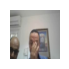

tensor([[0.5593, 0.2308, 0.2099]], grad_fn=<SoftmaxBackward0>)


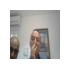

In [19]:
text_prompts =["A photo of a single person", "A photo of multiple persons", "A photo of two men"]
my_function(images_to_process, text_prompts)

tensor([[0.1019, 0.5956, 0.1441, 0.1584]], grad_fn=<SoftmaxBackward0>)


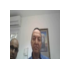

tensor([[0.0874, 0.3761, 0.2591, 0.2774]], grad_fn=<SoftmaxBackward0>)


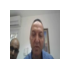

tensor([[0.0911, 0.5847, 0.1784, 0.1457]], grad_fn=<SoftmaxBackward0>)


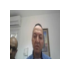

tensor([[0.0817, 0.5304, 0.1665, 0.2214]], grad_fn=<SoftmaxBackward0>)


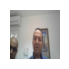

tensor([[0.1048, 0.5397, 0.1757, 0.1797]], grad_fn=<SoftmaxBackward0>)


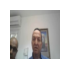

tensor([[0.1204, 0.4778, 0.1822, 0.2196]], grad_fn=<SoftmaxBackward0>)


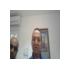

tensor([[0.1315, 0.4524, 0.2183, 0.1978]], grad_fn=<SoftmaxBackward0>)


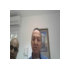

tensor([[0.2246, 0.4615, 0.1538, 0.1602]], grad_fn=<SoftmaxBackward0>)


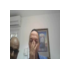

tensor([[0.1588, 0.4232, 0.2049, 0.2132]], grad_fn=<SoftmaxBackward0>)


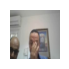

tensor([[0.1853, 0.4556, 0.1880, 0.1710]], grad_fn=<SoftmaxBackward0>)


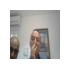

In [22]:
text_prompts =["A photo with no person", "A photo of a single person", "A photo of multiple persons", "A photo of two men"]
my_function(images_to_process, text_prompts)

tensor([[0.1147, 0.6704, 0.1622, 0.0527]], grad_fn=<SoftmaxBackward0>)


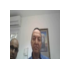

tensor([[0.1141, 0.4910, 0.3382, 0.0566]], grad_fn=<SoftmaxBackward0>)


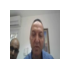

tensor([[0.1009, 0.6475, 0.1976, 0.0540]], grad_fn=<SoftmaxBackward0>)


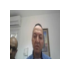

tensor([[0.1002, 0.6503, 0.2041, 0.0455]], grad_fn=<SoftmaxBackward0>)


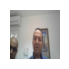

tensor([[0.1219, 0.6273, 0.2043, 0.0465]], grad_fn=<SoftmaxBackward0>)


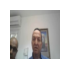

tensor([[0.1431, 0.5677, 0.2165, 0.0727]], grad_fn=<SoftmaxBackward0>)


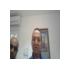

tensor([[0.1550, 0.5334, 0.2573, 0.0543]], grad_fn=<SoftmaxBackward0>)


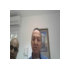

tensor([[0.1855, 0.3812, 0.1270, 0.3063]], grad_fn=<SoftmaxBackward0>)


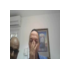

tensor([[0.1488, 0.3966, 0.1920, 0.2627]], grad_fn=<SoftmaxBackward0>)


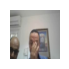

tensor([[0.1862, 0.4579, 0.1890, 0.1670]], grad_fn=<SoftmaxBackward0>)


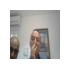

In [23]:
text_prompts =["A photo with no person", "A photo of a single person", "A photo of multiple persons", "A photo with multiple faces."]
my_function(images_to_process, text_prompts)

tensor([[0.0352, 0.2076, 0.6927, 0.0645]], grad_fn=<SoftmaxBackward0>)


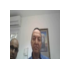

tensor([[0.0547, 0.6068, 0.2905, 0.0480]], grad_fn=<SoftmaxBackward0>)


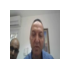

tensor([[0.0403, 0.2577, 0.6228, 0.0792]], grad_fn=<SoftmaxBackward0>)


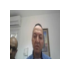

tensor([[0.0423, 0.2340, 0.6703, 0.0534]], grad_fn=<SoftmaxBackward0>)


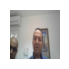

tensor([[0.0407, 0.2511, 0.6484, 0.0598]], grad_fn=<SoftmaxBackward0>)


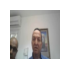

tensor([[0.0621, 0.3037, 0.5696, 0.0645]], grad_fn=<SoftmaxBackward0>)


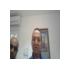

tensor([[0.0619, 0.3986, 0.4956, 0.0438]], grad_fn=<SoftmaxBackward0>)


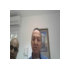

tensor([[0.2362, 0.3573, 0.2268, 0.1798]], grad_fn=<SoftmaxBackward0>)


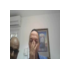

tensor([[0.2227, 0.3919, 0.2284, 0.1570]], grad_fn=<SoftmaxBackward0>)


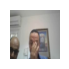

tensor([[0.1510, 0.3836, 0.3184, 0.1470]], grad_fn=<SoftmaxBackward0>)


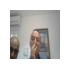

In [26]:
text_prompts =["A photo has no face", "A photo has no persons face", "A photo of a single person", "A photo showing multiple faces."]
my_function(images_to_process, text_prompts)

tensor([[0.0424, 0.0340, 0.8450, 0.0786]], grad_fn=<SoftmaxBackward0>)


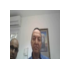

tensor([[0.1057, 0.1350, 0.6515, 0.1078]], grad_fn=<SoftmaxBackward0>)


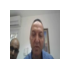

tensor([[0.0508, 0.0403, 0.8064, 0.1025]], grad_fn=<SoftmaxBackward0>)


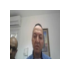

tensor([[0.0397, 0.0361, 0.8561, 0.0682]], grad_fn=<SoftmaxBackward0>)


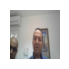

tensor([[0.0428, 0.0415, 0.8384, 0.0773]], grad_fn=<SoftmaxBackward0>)


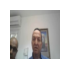

tensor([[0.0645, 0.0603, 0.7862, 0.0890]], grad_fn=<SoftmaxBackward0>)


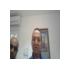

tensor([[0.0745, 0.0700, 0.7860, 0.0695]], grad_fn=<SoftmaxBackward0>)


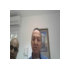

tensor([[0.2937, 0.2354, 0.2626, 0.2082]], grad_fn=<SoftmaxBackward0>)


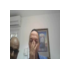

tensor([[0.2773, 0.2301, 0.2919, 0.2007]], grad_fn=<SoftmaxBackward0>)


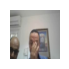

tensor([[0.2291, 0.1823, 0.4027, 0.1859]], grad_fn=<SoftmaxBackward0>)


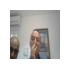

In [28]:
text_prompts =["A photo does not have any person's face.", "A photo has no person's faces.", "A photo of a single person", "A photo showing multiple faces."]
my_function(images_to_process, text_prompts)

tensor([[0.0263, 0.0304, 0.6719, 0.0800, 0.1913]], grad_fn=<SoftmaxBackward0>)


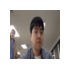

tensor([[0.0816, 0.0748, 0.6541, 0.0698, 0.1197]], grad_fn=<SoftmaxBackward0>)


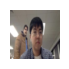

tensor([[0.0181, 0.0163, 0.8003, 0.0485, 0.1168]], grad_fn=<SoftmaxBackward0>)


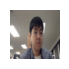

tensor([[0.0445, 0.0433, 0.6790, 0.0804, 0.1527]], grad_fn=<SoftmaxBackward0>)


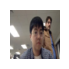

tensor([[0.0939, 0.1026, 0.5100, 0.1291, 0.1645]], grad_fn=<SoftmaxBackward0>)


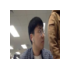

tensor([[0.0621, 0.0718, 0.5601, 0.1230, 0.1830]], grad_fn=<SoftmaxBackward0>)


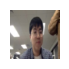

tensor([[0.0229, 0.0232, 0.6649, 0.0697, 0.2193]], grad_fn=<SoftmaxBackward0>)


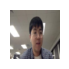

tensor([[0.0403, 0.0420, 0.6886, 0.0489, 0.1803]], grad_fn=<SoftmaxBackward0>)


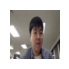

tensor([[0.0403, 0.0420, 0.6886, 0.0489, 0.1803]], grad_fn=<SoftmaxBackward0>)


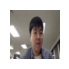

tensor([[0.0759, 0.0765, 0.6631, 0.0956, 0.0889]], grad_fn=<SoftmaxBackward0>)


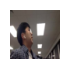

tensor([[0.1177, 0.0864, 0.6855, 0.0683, 0.0422]], grad_fn=<SoftmaxBackward0>)


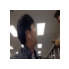

tensor([[0.1819, 0.2941, 0.3161, 0.1067, 0.1013]], grad_fn=<SoftmaxBackward0>)


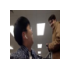

tensor([[0.2387, 0.2373, 0.4134, 0.0416, 0.0690]], grad_fn=<SoftmaxBackward0>)


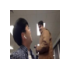

tensor([[0.0223, 0.0267, 0.7634, 0.0378, 0.1499]], grad_fn=<SoftmaxBackward0>)


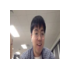

In [30]:
images_to_process = [
    "/home/ajeet/codework/dataset_frames/2655744/0_391.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_392.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_393.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_394.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_395.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_396.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_397.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_398.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_398.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_400.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_401.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_402.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_403.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_404.jpg",


]
text_prompts =["A photo does not have any person's face.", "A photo has no person's faces.", "A photo of a single person", "A photo showing multiple faces.", "A photo showing multiple persons"]
my_function(images_to_process, text_prompts)

tensor([[0.0284, 0.7264, 0.1587, 0.0865]], grad_fn=<SoftmaxBackward0>)


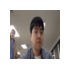

tensor([[0.0792, 0.6343, 0.2188, 0.0677]], grad_fn=<SoftmaxBackward0>)


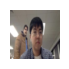

tensor([[0.0193, 0.8523, 0.0767, 0.0516]], grad_fn=<SoftmaxBackward0>)


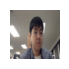

tensor([[0.0458, 0.6990, 0.1724, 0.0828]], grad_fn=<SoftmaxBackward0>)


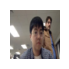

tensor([[0.0958, 0.5199, 0.2527, 0.1316]], grad_fn=<SoftmaxBackward0>)


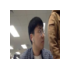

tensor([[0.0588, 0.5300, 0.2948, 0.1164]], grad_fn=<SoftmaxBackward0>)


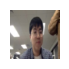

tensor([[0.0266, 0.7716, 0.1209, 0.0809]], grad_fn=<SoftmaxBackward0>)


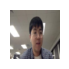

tensor([[0.0441, 0.7530, 0.1494, 0.0535]], grad_fn=<SoftmaxBackward0>)


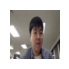

tensor([[0.0441, 0.7530, 0.1494, 0.0535]], grad_fn=<SoftmaxBackward0>)


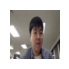

tensor([[0.0741, 0.6472, 0.1854, 0.0933]], grad_fn=<SoftmaxBackward0>)


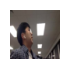

tensor([[0.1105, 0.6434, 0.1820, 0.0641]], grad_fn=<SoftmaxBackward0>)


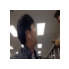

tensor([[0.1564, 0.2718, 0.4801, 0.0917]], grad_fn=<SoftmaxBackward0>)


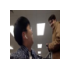

tensor([[0.2558, 0.4429, 0.2567, 0.0446]], grad_fn=<SoftmaxBackward0>)


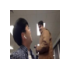

tensor([[0.0242, 0.8283, 0.1065, 0.0410]], grad_fn=<SoftmaxBackward0>)


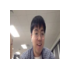

In [36]:
images_to_process = [
    "/home/ajeet/codework/dataset_frames/2655744/0_391.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_392.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_393.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_394.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_395.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_396.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_397.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_398.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_398.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_400.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_401.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_402.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_403.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_404.jpg",


]
text_prompts =["A photo does not have any person's face.", "A photo of a single person", 
               "A photo has multiple faces.", "A photo showing multiple faces."]
my_function(images_to_process, text_prompts)

tensor([[0.0244, 0.6241, 0.1564, 0.1207, 0.0743]], grad_fn=<SoftmaxBackward0>)


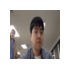

tensor([[0.0622, 0.4986, 0.2137, 0.1722, 0.0532]], grad_fn=<SoftmaxBackward0>)


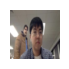

tensor([[0.0175, 0.7725, 0.1025, 0.0608, 0.0468]], grad_fn=<SoftmaxBackward0>)


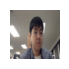

tensor([[0.0353, 0.5387, 0.1890, 0.1732, 0.0638]], grad_fn=<SoftmaxBackward0>)


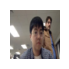

tensor([[0.0618, 0.3353, 0.3148, 0.2032, 0.0849]], grad_fn=<SoftmaxBackward0>)


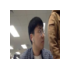

tensor([[0.0427, 0.3854, 0.2946, 0.1926, 0.0846]], grad_fn=<SoftmaxBackward0>)


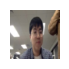

tensor([[0.0219, 0.6348, 0.1676, 0.1092, 0.0666]], grad_fn=<SoftmaxBackward0>)


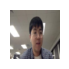

tensor([[0.0352, 0.6022, 0.1897, 0.1301, 0.0428]], grad_fn=<SoftmaxBackward0>)


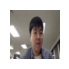

tensor([[0.0352, 0.6022, 0.1897, 0.1301, 0.0428]], grad_fn=<SoftmaxBackward0>)


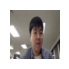

tensor([[0.0602, 0.5255, 0.1972, 0.1414, 0.0757]], grad_fn=<SoftmaxBackward0>)


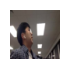

tensor([[0.0931, 0.5425, 0.1949, 0.1155, 0.0540]], grad_fn=<SoftmaxBackward0>)


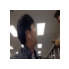

tensor([[0.0759, 0.1318, 0.3830, 0.3648, 0.0445]], grad_fn=<SoftmaxBackward0>)


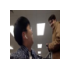

tensor([[0.1667, 0.2886, 0.2660, 0.2496, 0.0290]], grad_fn=<SoftmaxBackward0>)


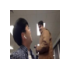

tensor([[0.0186, 0.6378, 0.1483, 0.1637, 0.0315]], grad_fn=<SoftmaxBackward0>)


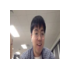

In [37]:
text_prompts =["A photo does not have any person's face.", "A photo of a single person", 
               "A photo has multiple person's faces.", "A photo has multiple people's faces.", "A photo showing multiple faces."]
my_function(images_to_process, text_prompts)

tensor([[0.4881, 0.1181, 0.0816, 0.1078, 0.2045]], grad_fn=<SoftmaxBackward0>)


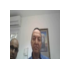

tensor([[0.2694, 0.1856, 0.1012, 0.1743, 0.2694]], grad_fn=<SoftmaxBackward0>)


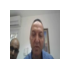

tensor([[0.4609, 0.1407, 0.1057, 0.0934, 0.1993]], grad_fn=<SoftmaxBackward0>)


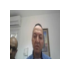

tensor([[0.4222, 0.1325, 0.1206, 0.0878, 0.2369]], grad_fn=<SoftmaxBackward0>)


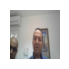

tensor([[0.4258, 0.1387, 0.0924, 0.1217, 0.2214]], grad_fn=<SoftmaxBackward0>)


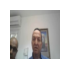

tensor([[0.3476, 0.1326, 0.1105, 0.1155, 0.2937]], grad_fn=<SoftmaxBackward0>)


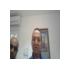

tensor([[0.3571, 0.1723, 0.0864, 0.1725, 0.2117]], grad_fn=<SoftmaxBackward0>)


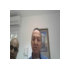

tensor([[0.3630, 0.1210, 0.1500, 0.0998, 0.2663]], grad_fn=<SoftmaxBackward0>)


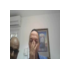

tensor([[0.3032, 0.1468, 0.1434, 0.1170, 0.2896]], grad_fn=<SoftmaxBackward0>)


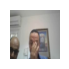

tensor([[0.3510, 0.0969, 0.2706, 0.0429, 0.2385]], grad_fn=<SoftmaxBackward0>)


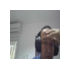

In [44]:
images_to_process = [
    "/home/ajeet/codework/dataset_frames/2602597/0_54.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_55.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_56.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_57.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_58.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_59.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_60.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_61.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_62.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_1000.jpg",


]
text_prompts =["A photo of a single person", "A photo of multiple persons", "A photo of multiple people", "A photo of two persons.", "A photo of two people"]
my_function(images_to_process, text_prompts)

Probabilities: tensor([[0.1960, 0.3460, 0.2897, 0.0281, 0.0648, 0.0340, 0.0414]])
Cosine Similarities: tensor([0.2373, 0.2429, 0.2412, 0.2178, 0.2262, 0.2197, 0.2217])


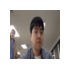

Probabilities: tensor([[0.1131, 0.1610, 0.2966, 0.0881, 0.1701, 0.0826, 0.0886]])
Cosine Similarities: tensor([0.2528, 0.2563, 0.2624, 0.2503, 0.2569, 0.2496, 0.2503])


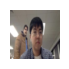

Probabilities: tensor([[0.1859, 0.3772, 0.3172, 0.0193, 0.0487, 0.0260, 0.0258]])
Cosine Similarities: tensor([0.2505, 0.2576, 0.2558, 0.2278, 0.2371, 0.2308, 0.2308])


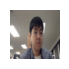

Probabilities: tensor([[0.1208, 0.2295, 0.1725, 0.1754, 0.1346, 0.0974, 0.0698]])
Cosine Similarities: tensor([0.2512, 0.2576, 0.2547, 0.2549, 0.2523, 0.2490, 0.2457])


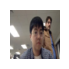

Probabilities: tensor([[0.1044, 0.2104, 0.0428, 0.2450, 0.1902, 0.0849, 0.1222]])
Cosine Similarities: tensor([0.2531, 0.2602, 0.2442, 0.2617, 0.2591, 0.2511, 0.2547])


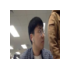

Probabilities: tensor([[0.0887, 0.1906, 0.0644, 0.3029, 0.1761, 0.0869, 0.0903]])
Cosine Similarities: tensor([0.2549, 0.2626, 0.2517, 0.2672, 0.2618, 0.2547, 0.2551])


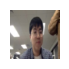

Probabilities: tensor([[0.2417, 0.3285, 0.2931, 0.0230, 0.0530, 0.0269, 0.0338]])
Cosine Similarities: tensor([0.2412, 0.2442, 0.2431, 0.2176, 0.2260, 0.2192, 0.2215])


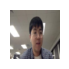

Probabilities: tensor([[0.2165, 0.3441, 0.2917, 0.0240, 0.0640, 0.0251, 0.0345]])
Cosine Similarities: tensor([0.2320, 0.2366, 0.2349, 0.2099, 0.2198, 0.2104, 0.2136])


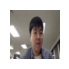

Probabilities: tensor([[0.2165, 0.3441, 0.2917, 0.0240, 0.0640, 0.0251, 0.0345]])
Cosine Similarities: tensor([0.2320, 0.2366, 0.2349, 0.2099, 0.2198, 0.2104, 0.2136])


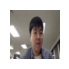

Probabilities: tensor([[0.1641, 0.3487, 0.1561, 0.0611, 0.1449, 0.0439, 0.0812]])
Cosine Similarities: tensor([0.2398, 0.2474, 0.2393, 0.2300, 0.2386, 0.2266, 0.2328])


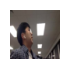

Probabilities: tensor([[0.1486, 0.4375, 0.1233, 0.0811, 0.1100, 0.0425, 0.0570]])
Cosine Similarities: tensor([0.2548, 0.2656, 0.2529, 0.2487, 0.2518, 0.2423, 0.2452])


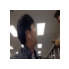

Probabilities: tensor([[0.0833, 0.1984, 0.0667, 0.2005, 0.2436, 0.0823, 0.1253]])
Cosine Similarities: tensor([0.2388, 0.2474, 0.2365, 0.2476, 0.2495, 0.2387, 0.2429])


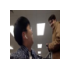

Probabilities: tensor([[0.0828, 0.1684, 0.0812, 0.1715, 0.3068, 0.0658, 0.1235]])
Cosine Similarities: tensor([0.2295, 0.2366, 0.2293, 0.2367, 0.2425, 0.2272, 0.2334])


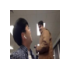

Probabilities: tensor([[0.2388, 0.2941, 0.3707, 0.0164, 0.0400, 0.0180, 0.0220]])
Cosine Similarities: tensor([0.2426, 0.2447, 0.2470, 0.2158, 0.2247, 0.2168, 0.2188])


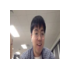

In [98]:
images_to_process = [
    "/home/ajeet/codework/dataset_frames/2655744/0_391.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_392.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_393.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_394.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_395.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_396.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_397.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_398.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_398.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_400.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_401.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_402.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_403.jpg",
    "/home/ajeet/codework/dataset_frames/2655744/0_404.jpg",


]
# text_prompts =["A photo of multiple persons", "A photo of a single person.", "A photo of a single woman.", "A photo of a single person in a room", "A photo of a single person indoors."]

# text_prompts =["A photo of a single person.", "A photo of one person.", "A photo of 1 person.", "A photo of two persons","A photo of 2 persons"]
# my_function(images_to_process, text_prompts)

# text_prompts =["A photo of zero person", "A photo of 0 person", "A photo of a single person.", "A photo of one person.", "A photo of 1 person.", "A photo of 2 people","A photo of 2 persons", 
#                "A photo of multiple people.", "A photo of multiple persons"]
# my_function(images_to_process, text_prompts)

# text_prompts =["A photo of zero person", "A photo of 0 person", "A photo of one person.", "A photo of 1 person.", "A photo of 2 people","A photo of 2 persons", 
#                "A photo of multiple people.", "A photo of multiple persons", 
#                "A photo of 2 or more persons", "A photo of two or more persons",  "A photo of 2 or more people", "A photo of two or more people"]
# my_function(images_to_process, text_prompts)

# text_prompts =["A photo of 0 person", "A photo of one person.", "A photo of 1 person.",  
#                "A photo of 2 people's faces", "A photo of 2 persons faces", "A photo of 2 or more people's faces", "A photo of two or more persons faces"]
# my_function(images_to_process, text_prompts)

text_prompts =["A photo of 1 person's face.", "A photo of 1 people face", "A photo of 1 person.",  
               "A photo of 2 people's faces", "A photo of 2 persons faces", "A photo of 2 or more people's faces", "A photo of two or more persons faces"]
my_function(images_to_process, text_prompts)

Probabilities: tensor([[0.0780, 0.0237, 0.1527, 0.0445, 0.0176, 0.0704, 0.0574, 0.1849, 0.0927,
         0.0414, 0.0932, 0.0125, 0.0098, 0.0085, 0.0275, 0.0853]])
Cosine Similarities: tensor([0.2126, 0.2007, 0.2193, 0.2070, 0.1977, 0.2116, 0.2096, 0.2213, 0.2144,
        0.2063, 0.2144, 0.1943, 0.1919, 0.1905, 0.2022, 0.2135])


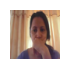

In [100]:
images_to_process = [
    "/home/ajeet/codework/dataset_frames/2572904/0_4.jpg",
    # "/home/ajeet/codework/dataset_frames/2572904/0_1541.jpg",
    # "/home/ajeet/codework/dataset_frames/2572904/0_1541.jpg",
    # "/home/ajeet/codework/dataset_frames/2572904/0_1542.jpg",
    # "/home/ajeet/codework/dataset_frames/2572904/0_1543.jpg",
    # "/home/ajeet/codework/dataset_frames/2572904/0_1544.jpg",
    # "/home/ajeet/codework/dataset_frames/2572904/0_1545.jpg",
    # "/home/ajeet/codework/dataset_frames/2572904/0_1546.jpg",
    # "/home/ajeet/codework/dataset_frames/2572904/0_1547.jpg",
    # "/home/ajeet/codework/dataset_frames/2572904/0_1548.jpg",
    # "/home/ajeet/codework/dataset_frames/2572904/0_1549.jpg",
    # "/home/ajeet/codework/dataset_frames/2572904/0_1550.jpg",
    # "/home/ajeet/codework/dataset_frames/2572904/0_1551.jpg",
    # "/home/ajeet/codework/dataset_frames/2572904/0_1552.jpg",
    # "/home/ajeet/codework/dataset_frames/2572904/0_1553.jpg",
    # "/home/ajeet/codework/dataset_frames/2572904/0_1554.jpg",


]
# text_prompts =["A photo of a single person", "A photo of two persons", "A photo of two men", "A photo of two women", 
#                "A photo of two or more women", "A photo of two or more men"]

# text_prompts =["A photo of a single person.", "A photo of one person.", "A photo of 1 person.", "A photo of two persons","A photo of 2 persons"]
# my_function(images_to_process, text_prompts)

text_prompts = [
    "a photo of 2 persons",
    "a photo of 2 people",
    "a photo of 2 or more persons",
    "a photo of 2 or more peoples",

    "a photo of 2 people's faces",
    "a photo of 2 persons faces",
    "a photo of 2 or more people's faces",
    "a photo of 2 or more persons faces",

    "a photo of 1 person",
    "a photo of 1 people",
    "a photo of 1 person's face",

    "a photo of no people",
    "a photo of a place without any people.",
    "a photo of a place without any person.",
    "a photo of 0 people's faces.",
    "a photo of 0 persons' faces.",

]
my_function(images_to_process, text_prompts)

In [6]:
# Adding the provided values together
values = [0.2126, 0.2007, 0.2193, 0.2070, 0.1977, 0.2116, 0.2096, 0.2213]
total_sum = sum(values)
total_sum/8


0.20997500000000002

In [7]:
# Adding the provided values together
values = [0.2144, 0.2063, 0.2144]
total_sum = sum(values)
total_sum/3

0.2117

In [8]:
values = [0.1943, 0.1919, 0.1905, 0.2022, 0.2135]
total_sum = sum(values)
total_sum/5

0.19848

In [ ]:
import streamlit as st
from modeling_clip import CLIP
import os
import time
from PIL import Image, ImageDraw, ImageFont

# Initialize components
clip_model = CLIP(device="cpu")

images, image_embeddings = clip_model.get_image_embeddings(frames)

Probabilities: tensor([[0.1508, 0.1605, 0.3214, 0.1182, 0.1057, 0.0436, 0.0450, 0.0204, 0.0345]])
Cosine Similarities: tensor([0.2301, 0.2307, 0.2377, 0.2276, 0.2265, 0.2177, 0.2180, 0.2101, 0.2153])


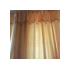

Probabilities: tensor([[0.1605, 0.1796, 0.2597, 0.1013, 0.1161, 0.0615, 0.0644, 0.0212, 0.0356]])
Cosine Similarities: tensor([0.2196, 0.2207, 0.2244, 0.2150, 0.2163, 0.2100, 0.2104, 0.1993, 0.2045])


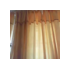

Probabilities: tensor([[0.1555, 0.1884, 0.3428, 0.1023, 0.1036, 0.0361, 0.0381, 0.0136, 0.0194]])
Cosine Similarities: tensor([0.2334, 0.2354, 0.2414, 0.2293, 0.2294, 0.2188, 0.2194, 0.2091, 0.2126])


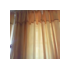

Probabilities: tensor([[0.1772, 0.1672, 0.3314, 0.1129, 0.1031, 0.0325, 0.0403, 0.0123, 0.0231]])
Cosine Similarities: tensor([0.2341, 0.2335, 0.2404, 0.2296, 0.2287, 0.2171, 0.2193, 0.2075, 0.2137])


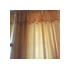

Probabilities: tensor([[0.1604, 0.2171, 0.3349, 0.0854, 0.0968, 0.0357, 0.0371, 0.0137, 0.0190]])
Cosine Similarities: tensor([0.2334, 0.2365, 0.2408, 0.2271, 0.2284, 0.2184, 0.2188, 0.2088, 0.2121])


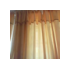

Probabilities: tensor([[0.0406, 0.0340, 0.0803, 0.2214, 0.1986, 0.1181, 0.1561, 0.0435, 0.1073]])
Cosine Similarities: tensor([0.1928, 0.1910, 0.1996, 0.2098, 0.2087, 0.2035, 0.2063, 0.1935, 0.2025])


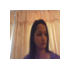

Probabilities: tensor([[0.0459, 0.0569, 0.0819, 0.2425, 0.2091, 0.1686, 0.0815, 0.0477, 0.0659]])
Cosine Similarities: tensor([0.1881, 0.1902, 0.1939, 0.2047, 0.2032, 0.2011, 0.1938, 0.1885, 0.1917])


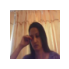

Probabilities: tensor([[0.0535, 0.0962, 0.1757, 0.1944, 0.1918, 0.1012, 0.0592, 0.0574, 0.0706]])
Cosine Similarities: tensor([0.2039, 0.2098, 0.2158, 0.2168, 0.2167, 0.2103, 0.2049, 0.2046, 0.2067])


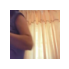

In [91]:
images_to_process = [
    "/home/ajeet/codework/dataset_frames/2572904/0_2538.jpg",
    "/home/ajeet/codework/dataset_frames/2572904/0_2539.jpg",
    "/home/ajeet/codework/dataset_frames/2572904/0_2540.jpg",
    "/home/ajeet/codework/dataset_frames/2572904/0_2541.jpg",
    "/home/ajeet/codework/dataset_frames/2572904/0_2542.jpg",
    "/home/ajeet/codework/dataset_frames/2572904/0_2551.jpg",
    "/home/ajeet/codework/dataset_frames/2572904/0_2552.jpg",
    "/home/ajeet/codework/dataset_frames/2572904/0_2553.jpg",


]
# text_prompts =["A photo of a single person", "A photo of two persons", "A photo of two men", "A photo of two women", 
#                "A photo of two or more women", "A photo of two or more men"]

# text_prompts =["A photo of a single person.", "A photo of one person.", "A photo of 1 person.", "A photo of two persons","A photo of 2 persons"]
# my_function(images_to_process, text_prompts)

text_prompts =["A photo of zero person", "A photo of 0 person", "A photo of a single person.", "A photo of one person.", "A photo of 1 person.", "A photo of 2 people","A photo of 2 persons", 
               "A photo of multiple people.", "A photo of multiple persons"]
my_function(images_to_process, text_prompts)

Probabilities: tensor([[0.1306, 0.0661, 0.2739, 0.0163, 0.0499, 0.1160, 0.1206, 0.0614, 0.1146,
         0.0506]])
Cosine Similarities: tensor([0.2283, 0.2215, 0.2357, 0.2075, 0.2186, 0.2271, 0.2275, 0.2207, 0.2270,
        0.2188])


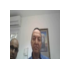

Probabilities: tensor([[0.0808, 0.0472, 0.2530, 0.0165, 0.0553, 0.1646, 0.1500, 0.0672, 0.1163,
         0.0492]])
Cosine Similarities: tensor([0.2063, 0.2009, 0.2177, 0.1904, 0.2025, 0.2134, 0.2125, 0.2045, 0.2100,
        0.2013])


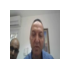

Probabilities: tensor([[0.1268, 0.0699, 0.2868, 0.0180, 0.0508, 0.1029, 0.1256, 0.0496, 0.1267,
         0.0429]])
Cosine Similarities: tensor([0.2323, 0.2263, 0.2404, 0.2128, 0.2231, 0.2302, 0.2322, 0.2229, 0.2323,
        0.2214])


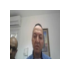

Probabilities: tensor([[0.1039, 0.0855, 0.2623, 0.0213, 0.0539, 0.1114, 0.1138, 0.0580, 0.1344,
         0.0556]])
Cosine Similarities: tensor([0.2263, 0.2244, 0.2356, 0.2105, 0.2198, 0.2270, 0.2272, 0.2205, 0.2289,
        0.2201])


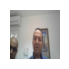

Probabilities: tensor([[0.1121, 0.0631, 0.2412, 0.0186, 0.0542, 0.1258, 0.1426, 0.0672, 0.1253,
         0.0499]])
Cosine Similarities: tensor([0.2246, 0.2188, 0.2322, 0.2066, 0.2173, 0.2257, 0.2270, 0.2194, 0.2257,
        0.2165])


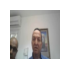

Probabilities: tensor([[0.1026, 0.0655, 0.2306, 0.0227, 0.0524, 0.1259, 0.1276, 0.0610, 0.1490,
         0.0627]])
Cosine Similarities: tensor([0.2181, 0.2137, 0.2262, 0.2031, 0.2114, 0.2202, 0.2203, 0.2129, 0.2219,
        0.2132])


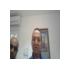

Probabilities: tensor([[0.0894, 0.0459, 0.2455, 0.0143, 0.0549, 0.1724, 0.1671, 0.0641, 0.1092,
         0.0374]])
Cosine Similarities: tensor([0.2198, 0.2131, 0.2299, 0.2015, 0.2149, 0.2264, 0.2260, 0.2165, 0.2218,
        0.2111])


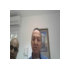

Probabilities: tensor([[0.1116, 0.2029, 0.1862, 0.0427, 0.0335, 0.0532, 0.0660, 0.0313, 0.2126,
         0.0600]])
Cosine Similarities: tensor([0.2353, 0.2413, 0.2404, 0.2257, 0.2232, 0.2279, 0.2300, 0.2226, 0.2417,
        0.2291])


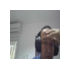

Probabilities: tensor([[0.0804, 0.0979, 0.2100, 0.0288, 0.0418, 0.0831, 0.1132, 0.0553, 0.2094,
         0.0801]])
Cosine Similarities: tensor([0.2315, 0.2335, 0.2411, 0.2212, 0.2249, 0.2318, 0.2349, 0.2277, 0.2411,
        0.2314])


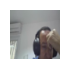

Probabilities: tensor([[0.1458, 0.1043, 0.2258, 0.0304, 0.0504, 0.0519, 0.1041, 0.0522, 0.1813,
         0.0539]])
Cosine Similarities: tensor([0.2374, 0.2340, 0.2418, 0.2217, 0.2268, 0.2271, 0.2340, 0.2271, 0.2396,
        0.2275])


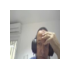

In [95]:
images_to_process = [
    "/home/ajeet/codework/dataset_frames/2602597/0_54.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_55.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_56.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_57.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_58.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_59.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_60.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_1000.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_1050.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_1200.jpg",


]
# text_prompts =["A photo of a single person.", "A photo of one person.", "A photo of 1 person.", "A photo of two persons","A photo of 2 persons", 
#                "A photo of multiple people.", "A photo of multiple persons"]
# my_function(images_to_process, text_prompts)

text_prompts =["A photo of zero person", "A photo of 0 person", "A photo of 1 person.", 
               "A photo of multiple people.", "A photo of multiple persons", 
               "A photo of 2 persons", "A photo of 2 or more persons", "A photo of two or more persons",  "A photo of 2 or more people", "A photo of two or more people"]
my_function(images_to_process, text_prompts)

Probabilities: tensor([[0.1129, 0.3654, 0.2576, 0.0928, 0.1091, 0.0153, 0.0470]])
Cosine Similarities: tensor([0.2274, 0.2392, 0.2357, 0.2255, 0.2271, 0.2075, 0.2186])


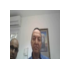

Probabilities: tensor([[0.0575, 0.2364, 0.2962, 0.1331, 0.1927, 0.0193, 0.0648]])
Cosine Similarities: tensor([0.2013, 0.2155, 0.2177, 0.2097, 0.2134, 0.1904, 0.2025])


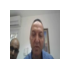

Probabilities: tensor([[0.0932, 0.3494, 0.2864, 0.0995, 0.1028, 0.0180, 0.0507]])
Cosine Similarities: tensor([0.2292, 0.2424, 0.2404, 0.2299, 0.2302, 0.2128, 0.2231])


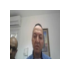

Probabilities: tensor([[0.0964, 0.3149, 0.2630, 0.1387, 0.1117, 0.0213, 0.0540]])
Cosine Similarities: tensor([0.2255, 0.2374, 0.2356, 0.2292, 0.2270, 0.2105, 0.2198])


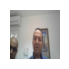

Probabilities: tensor([[0.1082, 0.3208, 0.2556, 0.1050, 0.1333, 0.0197, 0.0574]])
Cosine Similarities: tensor([0.2236, 0.2345, 0.2322, 0.2233, 0.2257, 0.2066, 0.2173])


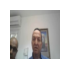

Probabilities: tensor([[0.0905, 0.2737, 0.2590, 0.1511, 0.1414, 0.0255, 0.0588]])
Cosine Similarities: tensor([0.2157, 0.2268, 0.2262, 0.2209, 0.2202, 0.2031, 0.2114])


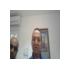

Probabilities: tensor([[0.0797, 0.2778, 0.2740, 0.0990, 0.1924, 0.0160, 0.0612]])
Cosine Similarities: tensor([0.2175, 0.2300, 0.2299, 0.2197, 0.2264, 0.2015, 0.2149])


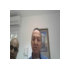

Probabilities: tensor([[0.0974, 0.2234, 0.2361, 0.2790, 0.0675, 0.0541, 0.0424]])
Cosine Similarities: tensor([0.2316, 0.2399, 0.2404, 0.2421, 0.2279, 0.2257, 0.2232])


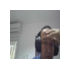

Probabilities: tensor([[0.0774, 0.2914, 0.2293, 0.2341, 0.0908, 0.0314, 0.0456]])
Cosine Similarities: tensor([0.2302, 0.2435, 0.2411, 0.2413, 0.2318, 0.2212, 0.2249])


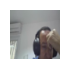

Probabilities: tensor([[0.1327, 0.3538, 0.2498, 0.1169, 0.0574, 0.0336, 0.0557]])
Cosine Similarities: tensor([0.2354, 0.2453, 0.2418, 0.2342, 0.2271, 0.2217, 0.2268])


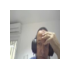

In [88]:
images_to_process = [
    "/home/ajeet/codework/dataset_frames/2602597/0_54.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_55.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_56.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_57.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_58.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_59.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_60.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_1000.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_1050.jpg",
    "/home/ajeet/codework/dataset_frames/2602597/0_1200.jpg",


]
text_prompts =["A photo of a single person.", "A photo of one person.", "A photo of 1 person.", "A photo of 2 people","A photo of 2 persons", 
               "A photo of multiple people.", "A photo of multiple persons"]
my_function(images_to_process, text_prompts)